In [1]:
import pandas as pd

In [2]:
import json

In [3]:
from pandas.io.json import json_normalize
data = pd.read_json('userA_trips.json',  lines=True) 
data.head()

,end_location_lat,end_location_lon,end_location_name,end_time,end_timezone,id,start_location_lat,start_location_lon,start_location_name,start_time,start_timezone
0,37.35340,-121.95782,"1786 Hillebrant Place, Santa Clara CA 95050",2019-05-30 19:02:10,America/Los_Angeles,A-id-0,37.39951,-121.97882,"4699 Old Ironsides Drive, Santa Clara CA 95054",2019-05-30 18:32:06,America/Los_Angeles
1,37.39951,-121.97882,"4699 Old Ironsides Drive, Santa Clara CA 95054",2019-05-30 15:53:56,America/Los_Angeles,A-id-1,37.38881,-121.98369,"3127 Mission College Blvd, Santa Clara CA 95054",2019-05-30 15:45:58,America/Los_Angeles
2,37.38881,-121.98369,"3127 Mission College Blvd, Santa Clara CA 95054",2019-05-30 15:38:21,America/Los_Angeles,A-id-2,37.39855,-121.97594,"4659 Great America Pkwy, Santa Clara CA 95054",2019-05-30 15:32:50,America/Los_Angeles
3,37.39855,-121.97594,"4659 Great America Pkwy, Santa Clara CA 95054",2019-05-30 13:30:58,America/Los_Angeles,A-id-3,37.35346,-121.95822,"1831 Hillebrant Place, Santa Clara CA 95050",2019-05-30 13:20:21,America/Los_Angeles
4,37.35346,-121.95822,"1831 Hillebrant Place, Santa Clara CA 95050",2019-05-30 11:52:35,America/Los_Angeles,A-id-4,37.39584,-121.97791,"4500 Great America Pkwy, Santa Clara CA 95054",2019-05-30 11:42:26,America/Los_Angeles


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 11 columns):
end_location_lat       684 non-null float64
end_location_lon       684 non-null float64
end_location_name      684 non-null object
end_time               684 non-null datetime64[ns]
end_timezone           684 non-null object
id                     684 non-null object
start_location_lat     684 non-null float64
start_location_lon     684 non-null float64
start_location_name    684 non-null object
start_time             684 non-null datetime64[ns]
start_timezone         684 non-null object
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 58.9+ KB


In [5]:
data['end_location_name'].nunique()

163

In [30]:
data['end_location_name'].str.count("CA").sum()

684

In [6]:
data['end_location_lon'].nunique()

472

In [7]:
data['end_location_lat'].nunique()

376

In [8]:
data['start_location_name'].nunique()

177

In [31]:
data['start_location_name'].str.count("CA").sum()

684

In [9]:
data['end_timezone'].nunique()

1

In [12]:
data['start_timezone'].nunique()

1

In [26]:
### Removing the start & end timezones as they are only one
### names of start and end locations can be clustered and mapped later, for time being removing them
datasel = data.drop(['end_timezone','end_location_name','start_location_name','id','start_timezone'], axis=1)
datasel.head()

,end_location_lat,end_location_lon,end_time,start_location_lat,start_location_lon,start_time
0,37.35340,-121.95782,2019-05-30 19:02:10,37.39951,-121.97882,2019-05-30 18:32:06
1,37.39951,-121.97882,2019-05-30 15:53:56,37.38881,-121.98369,2019-05-30 15:45:58
2,37.38881,-121.98369,2019-05-30 15:38:21,37.39855,-121.97594,2019-05-30 15:32:50
3,37.39855,-121.97594,2019-05-30 13:30:58,37.35346,-121.95822,2019-05-30 13:20:21
4,37.35346,-121.95822,2019-05-30 11:52:35,37.39584,-121.97791,2019-05-30 11:42:26


In [27]:
datasel.describe()

,end_location_lat,end_location_lon,start_location_lat,start_location_lon
count,684.000000,684.000000,684.000000,684.000000
mean,37.365805,-121.973937,37.366098,-121.974388
std,0.034951,0.027643,0.035998,0.031306
min,37.227860,-122.172560,37.227860,-122.392630
25%,37.352680,-121.976390,37.352680,-121.976413
50%,37.353380,-121.971995,37.353400,-121.971995
75%,37.389682,-121.957600,37.389600,-121.957617
max,37.639260,-121.798670,37.639260,-121.798670


In [23]:
start_pt = [Point(xy) for xy in zip(datasel['start_location_lon'],datasel['start_location_lat'])]
start_pt[:3]

In [24]:
end_pt = [Point(xy) for xy in zip(datasel['end_location_lon'],datasel['end_location_lat'])]
end_pt[:3]

In [22]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

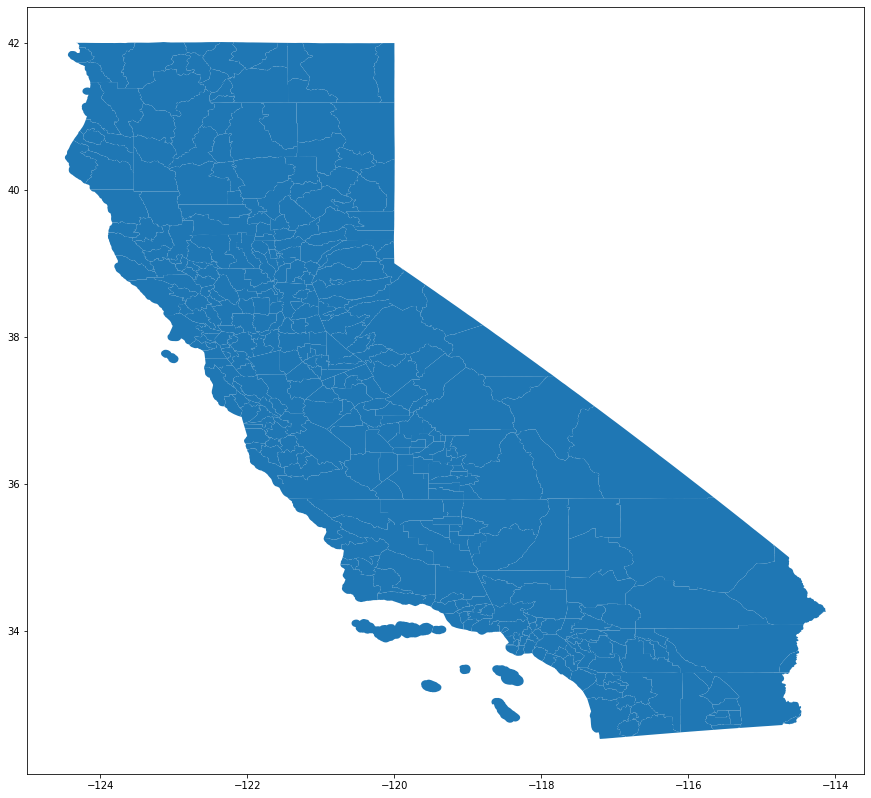

In [32]:
## As start location and end locations are belonging to CA, lets get CA map for visualization
street_map = gpd.read_file('tl_2016_06_cousub.shp')
fig,ax=plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [36]:
crs={'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(datasel, crs=crs, geometry=start_pt)
geo_df.head()

,end_location_lat,end_location_lon,end_time,start_location_lat,start_location_lon,start_time,geometry
0,37.35340,-121.95782,2019-05-30 19:02:10,37.39951,-121.97882,2019-05-30 18:32:06,POINT (-121.97882 37.39951)
1,37.39951,-121.97882,2019-05-30 15:53:56,37.38881,-121.98369,2019-05-30 15:45:58,POINT (-121.98369 37.38881)
2,37.38881,-121.98369,2019-05-30 15:38:21,37.39855,-121.97594,2019-05-30 15:32:50,POINT (-121.97594 37.39855)
3,37.39855,-121.97594,2019-05-30 13:30:58,37.35346,-121.95822,2019-05-30 13:20:21,POINT (-121.95822 37.35346)
4,37.35346,-121.95822,2019-05-30 11:52:35,37.39584,-121.97791,2019-05-30 11:42:26,POINT (-121.97791 37.39584)
